In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
testId = test['PassengerId']

In [3]:
train.isna().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

- Cabin has 77% data missing
- Age has 19.8 % data missing

In [4]:
train['Embarked'].fillna('C', inplace = True)

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train['Ticket'].nunique()

681

In [8]:
train.drop(['Ticket', 'Name'], axis=1, inplace=True)
test.drop(['Ticket', 'Name'] , axis=1, inplace = True)

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


<Axes: xlabel='Parch', ylabel='count'>

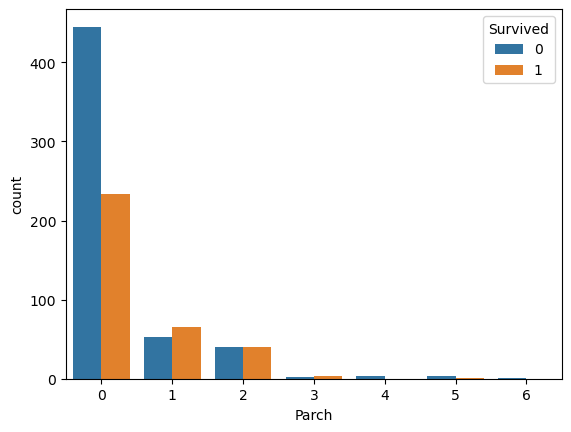

In [11]:
sns.countplot(x = 'Parch' , hue = 'Survived', data=train)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

<Axes: xlabel='Pclass', ylabel='Age'>

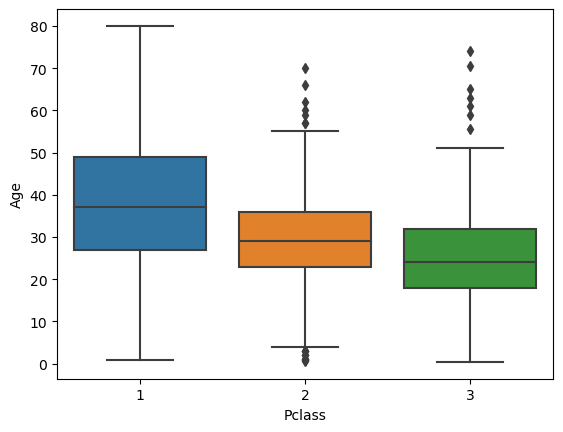

In [13]:
sns.boxplot(x = 'Pclass', y = 'Age', data=train)

In [14]:
train.groupby(['Pclass'])['Age'].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [15]:
def fillage(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isna(age) and pclass == 1:
        return 37
    elif pd.isna(age) and pclass ==2:
        return 29
    elif pd.isna(age) and pclass == 3:
        return 24
    else: return age

In [16]:
train.Age = train[['Age', 'Pclass']].apply(fillage, axis='columns')

In [17]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
X = train.iloc[:,2:]
y= train.Survived
Xt = test.iloc[:,1:]


In [21]:
X['Sexencoded'] = encoder.fit_transform(X['Sex'])
Xt['Sexencoded'] = encoder.fit_transform(Xt['Sex'])

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sexencoded
0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,female,38.0,1,0,71.2833,C85,C,0
2,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,female,35.0,1,0,53.1000,C123,S,0
4,3,male,35.0,0,0,8.0500,NaN,S,1


In [23]:
del X['Sex']
del Xt['Sex']
del X['Cabin']
del Xt['Cabin']


In [24]:
X['EmbarkedEncoded'] = encoder.fit_transform(X['Embarked'])
del X['Embarked']
Xt['EmbarkedEncoded'] = encoder.fit_transform(Xt['Embarked'])
del Xt['Embarked']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y , test_size=0.2, random_state=42)
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,Sexencoded,EmbarkedEncoded
331,1,45.5,0,0,28.5000,1,2
733,2,23.0,0,0,13.0000,1,2
382,3,32.0,0,0,7.9250,1,2
704,3,26.0,1,0,7.8542,1,2
813,3,6.0,4,2,31.2750,0,2


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [28]:
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=5000)

In [29]:
ypred = model.predict(Xtest)

In [30]:
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report,
                             precision_score,
                             recall_score,
                             f1_score)

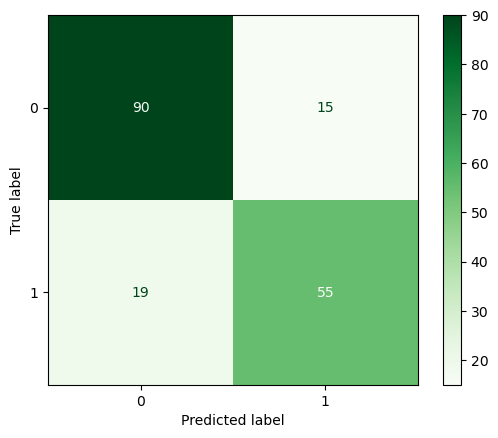

In [31]:
ConfusionMatrixDisplay.from_estimator(model, Xtest, ytest, cmap='Greens')

In [32]:
precision_score(ytest, ypred)

0.7857142857142857

In [33]:
f1_score(ytest, ypred)

0.7638888888888888

In [34]:
recall_score(ytest, ypred)

0.7432432432432432

In [35]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sexencoded,EmbarkedEncoded
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [36]:
Xt['Pclass'] = test['Pclass']

In [37]:
Xt.head()

,Pclass,Age,SibSp,Parch,Fare,Sexencoded,EmbarkedEncoded
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [38]:
last_col = Xt.iloc[:, -1]  

In [39]:
Xt.Age = Xt[['Age', 'Pclass']].apply(fillage, axis='columns')

In [40]:
Xt.isna().sum()
Xt.loc[152,'Fare']= 7.8958

In [41]:
Xt.groupby(['Pclass'])['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

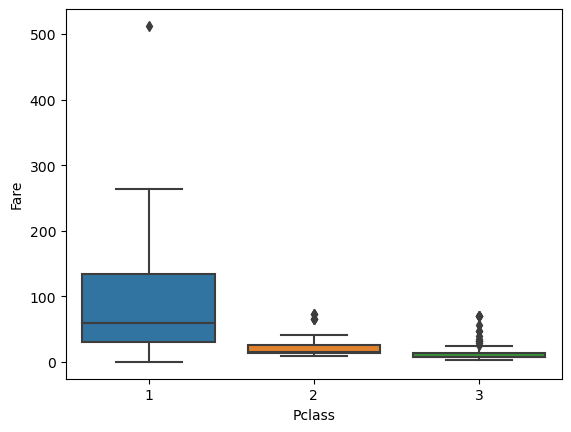

In [42]:
sns.boxplot(x = 'Pclass', y= 'Fare', data=Xt)

In [43]:
Xt.head()
testpred = model.predict(Xt)

In [44]:
df = pd.DataFrame({"PassengerId":testId.values,
                   "Survived":testpred
                  })

In [45]:
df.to_csv("submission.csv", index=False)